In [1]:
!pip install wget 
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import wget

In [2]:
#A url da imagem que a gente vai usar pro teste
url_imagem = 'https://www.pwc.com.br/pt/consultoria-negocios/pessoas-organizacao/assets/people-analytics.jpg'

In [3]:
#fazendo o download da imagem
arquivo = wget.download(url_imagem)

In [4]:
#url do modelo pre treinado do proprio cv2 para detectar um rosto em posição frontal
url_modelo_pre_treinado = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'

In [5]:
#fazendo download do modelo
arquivod_do_modelo = wget.download(url_modelo_pre_treinado)

In [6]:
#salvando um modelo numa variavel
faceClassif = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [7]:
#salvando a foto numa variavel
imagem_de_teste = 'people-analytics.jpg'

In [8]:
imagem = cv2.imread(imagem_de_teste)

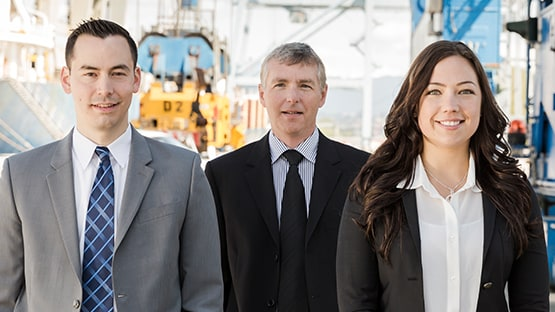

In [9]:
#mostrando a imagem que vamos usar
cv2_imshow(imagem)

In [10]:
#convertendo a imagem pra preto e branco, pois fica melhor pra transformar em binário
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

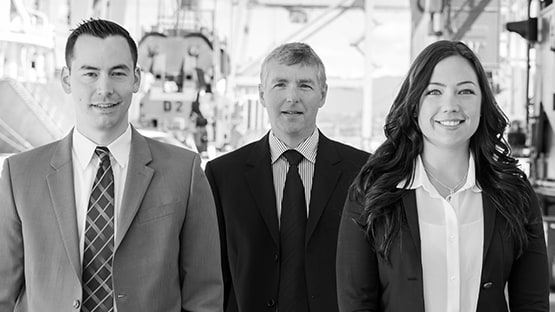

In [11]:
cv2_imshow(imagem_cinza)

In [12]:
#calibrando o modelo
faces = faceClassif.detectMultiScale(
    imagem_cinza,#usando a imagem cinza pra treinar
    scaleFactor= 1.1,#a escala de reduçao da imagem.Se ficar mt alto ou baixo pode dar falso positivo ou não detectar rosto
    minNeighbors=5, # quantidade mínima de retangulo delimitador de um rosto
    minSize=(30,30), # tamanho minimo possivel do objeto, rosto pequeno podem não ser identificado aqui
    maxSize=(200,200) # tamanho maximo, rostos grandes na foto pode não serem identificados aqui
)

In [13]:
for(x,y,w,h) in faces:
  cv2.rectangle(imagem, (x,y), (x+w, y+h), (0,255,0),2)

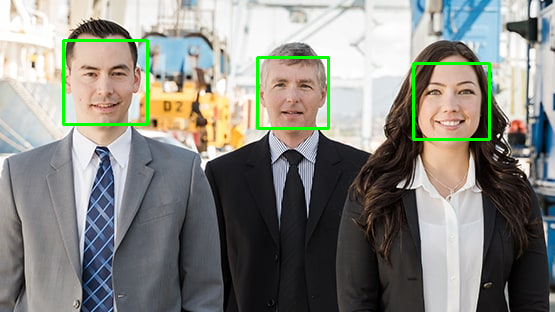

In [14]:
cv2_imshow(imagem)